<a href="https://colab.research.google.com/github/rodrigo103/AprendizajeAutomatico/blob/main/Mi_ClasificacionMNIST_TF2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

print(tf.__version__)

2.9.2


# MNIST Fully connected

In [2]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [11]:
class_names = ['0', '1', '2', '3', '4', '5',
               '6', '7', '8', '9']

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

## Preprocesando los datos

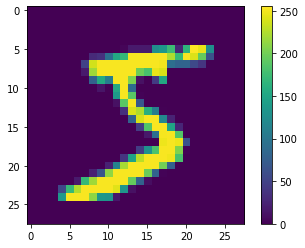

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

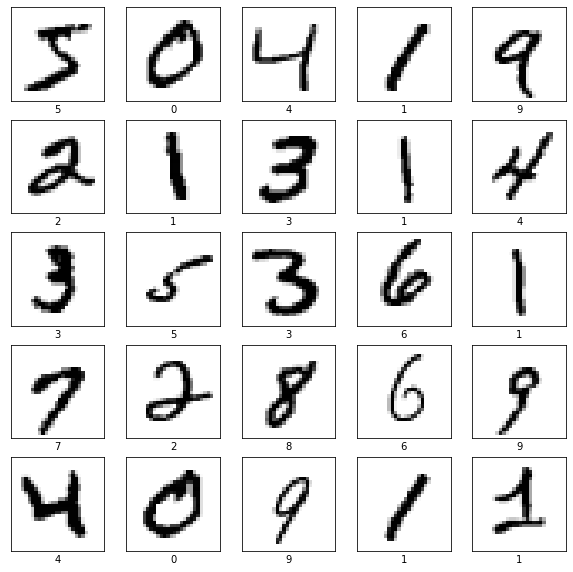

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Construyendo el modelo

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2533 - accuracy: 0.9279
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1111 - accuracy: 0.9671
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0774 - accuracy: 0.9768
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0575 - accuracy: 0.9819
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0440 - accuracy: 0.9864
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0349 - accuracy: 0.9893
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0276 - accuracy: 0.9912
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0233 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0185 - accuracy: 0.9945
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.015

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.0840 - accuracy: 0.9788 - 427ms/epoch - 1ms/step

Test accuracy: 0.9787999987602234


In [17]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [18]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [19]:
predictions[0]

array([1.4589399e-10, 1.0723200e-09, 1.0970827e-07, 6.2607855e-06,
       2.4764509e-16, 8.6825578e-09, 2.8365274e-15, 9.9999338e-01,
       2.3317142e-09, 1.4193027e-07], dtype=float32)

In [20]:
np.argmax(predictions[0])

7

In [21]:
test_labels[0]

7

In [22]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

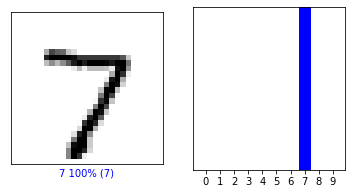

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

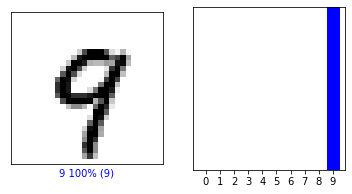

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

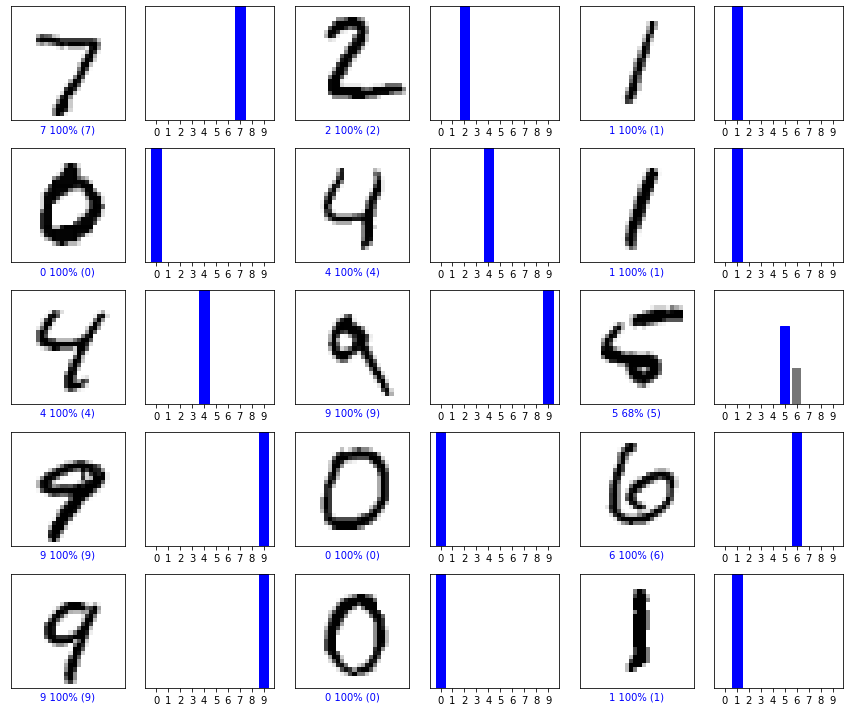

In [25]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [26]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [27]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [28]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 15ms/step
[[1.5771975e-16 9.0612382e-08 9.9999976e-01 1.9610538e-09 2.1625704e-22
  2.8619523e-11 1.5127120e-11 5.6642033e-20 6.3419762e-08 4.2851703e-18]]


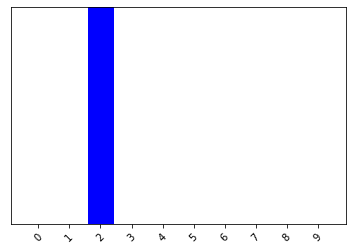

In [29]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [30]:
np.argmax(predictions_single[0])

2